In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from utils import *

In [3]:
ds_name = 'driver'
PATH = Path('../data/')/ds_name

## Driver preprocess

In [4]:
train_df = pd.read_csv(PATH/'raw/train.csv', index_col=0)
# test_df = pd.read_csv(PATH/'raw/test.csv')

train_df = train_df.loc[:,~train_df.columns.str.contains('calc')]
# test_df = test_df.loc[:,~test_df.columns.str.contains('calc')]

train_df.replace(-1, np.nan, inplace=True)
# test_df.replace(-1, np.nan, inplace=True)

FileNotFoundError: File b'../data/driver/raw/train.csv' does not exist

In [ ]:
cat_names = list(train_df.columns.values[train_df.apply(lambda x: len(np.unique(x)), 0) < 500][1:])
# cat_names = list(train_df.columns.values[train_df.columns.str.endswith('_cat')+train_df.columns.str.endswith('_bin')])

save_list(cat_names, PATH/'cat_names.txt')

np.random.seed(2019)
train_df, valid_df = train_test_split(train_df, test_size=0.2)

train_df.to_csv(PATH/'train.csv', index=None)
valid_df.to_csv(PATH/'valid.csv', index=None)
#test_df.to_csv(PATH/'test.csv', index=None)

del train_df; del valid_df#; del test_df
gc.collect()

## Bus preprocess

In [4]:
train_df = pd.read_csv(PATH/'raw/train_revised.csv')
test_df = pd.read_csv(PATH/'raw/test_questions.csv')

In [5]:
train_df = train_df.loc[:,test_df.columns.values]
ntickets = train_df['ride_id'].value_counts().to_frame('number_of_ticket')
train_df.drop_duplicates('ride_id', inplace=True)
train_df.set_index('ride_id', inplace=True)
test_df.set_index('ride_id', inplace=True)
train_df = train_df.join(ntickets, how='inner')

In [6]:
train_df['travel_date_time'] = pd.to_datetime(train_df['travel_date'] + ' ' + train_df['travel_time'], dayfirst=True)
test_df['travel_date_time'] = pd.to_datetime(test_df['travel_date'] + ' ' + test_df['travel_time'])

In [7]:
train_df.drop(columns = ['travel_to','max_capacity', 'travel_date', 'travel_time'], inplace=True)
test_df.drop(columns = ['travel_to', 'max_capacity', 'travel_date', 'travel_time'], inplace=True)

In [8]:
val_ind = train_df['travel_date_time'] > '2018-03-31'

In [9]:
add_datepart(train_df, 'travel_date_time', time=True)
add_datepart(test_df, 'travel_date_time', time=True)

In [10]:
valid_df = train_df[val_ind]
train_df = train_df[~val_ind]

In [11]:
train_df.head()

,travel_from,car_type,number_of_ticket,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Hour,Minute,Elapsed
1442,Migori,Bus,1,2017,10,42,17,1,290,False,False,7,15,1508224500
5437,Migori,Bus,1,2017,11,46,19,6,323,False,False,7,12,1511075520
5710,Keroka,Bus,1,2017,11,47,26,6,330,False,False,7,5,1511679900
5777,Homa Bay,Bus,5,2017,11,48,27,0,331,False,False,7,10,1511766600
5778,Migori,Bus,31,2017,11,48,27,0,331,False,False,7,12,1511766720


In [12]:
cat_names = ['travel_from', 'car_type', 'Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Is_month_end',
             'Is_month_start', 'Hour', 'Minute']

In [13]:
save_list(cat_names, PATH/'cat_names.txt')

In [14]:
train_df.to_csv(PATH/'train.csv')
valid_df.to_csv(PATH/'valid.csv')
test_df.to_csv(PATH/'test.csv')

# Medscheme Preprocess

In [158]:
df = pd.read_csv(PATH/'Clean_dataset.csv')

/Users/janmarais/anaconda3/envs/fastaiv1/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (6,7,8,9,10,11,12,13,14,26,38,39,40,41,43,49,561) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [159]:
# df=df.sample(10000)

In [73]:
df.shape

(452297, 618)

+ Clinical Coding
    - RFA
    - icd_1
    - cpt_1
    - nappi_1
    - nrpl_1
    - icd_1_associated
    - CODE_DESCRIPTION
    - SUBGROUP_DESCRIPTION
    - GROUP_DESCRIPTION
    - CATEGORY_DESCRIPTION
    - rfa_edc
    - icd_1_edc
    - icd_1_ass_edc
    
+ Beneficiary informations
    - acg
    - adg_count
+ Provider information
+ Trend and claiming information

In [160]:
keep_vars = ['RFA','icd_1','cpt_1','nappi_1','nrpl_1','icd_1_associated',
             'CODE_DESCRIPTION','SUBGROUP_DESCRIPTION','GROUP_DESCRIPTION',
             'CATEGORY_DESCRIPTION','rfa_edc','icd_1_edc','icd_1_ass_edc',
             'acg', 'adg_count']

cat_names = ['RFA','icd_1','cpt_1','nappi_1','nrpl_1','icd_1_associated',
            'CODE_DESCRIPTION','SUBGROUP_DESCRIPTION','GROUP_DESCRIPTION',
            'CATEGORY_DESCRIPTION','rfa_edc','icd_1_edc','icd_1_ass_edc']

In [161]:
save_list(cat_names, PATH/'cat_names.txt')

In [162]:
dep_var = 'TOTAL_COST'

In [163]:
df = df.loc[:, keep_vars+[dep_var]]

In [164]:
train_df, valid_df = train_test_split(df, test_size=0.15)

In [165]:
train_df.to_csv(PATH/'train.csv')
valid_df.to_csv(PATH/'valid.csv')
# test_df.to_csv(PATH/'test.csv')

# Modeling

+ implement rankGuases
+ think about adding cont vars with small amount of unique values as cats

In [166]:
ds_name = 'medscheme'
PATH = Path('../data/')/ds_name

In [167]:
train_df = pd.read_csv(PATH/'train.csv', index_col=0)
valid_df = pd.read_csv(PATH/'valid.csv', index_col=0)
# test_df = pd.read_csv(PATH/'test.csv')

/Users/janmarais/anaconda3/envs/fastaiv1/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [168]:
train_df.loc[train_df[dep_var]==0, dep_var]=1
valid_df.loc[valid_df[dep_var]==0, dep_var]=1

In [169]:
dep_var = 'TOTAL_COST'
cat_names = load_list(PATH/'cat_names.txt')

In [170]:
tfms = [FillMissing, Categorify]

In [171]:
bs=128
layer_spec = [100,100,100,100]
ps = [0.2,0.2,0.2,0.2]
log_output = True
regression = True

In [172]:
data = TabularDataBunch.from_df(PATH, train_df, valid_df, dep_var, tfms=tfms, cat_names=cat_names, bs=bs, log_output=True)

In [173]:
emb_szs = {n:my_def_emb_sz(train_df, n, {}, constant=None) for n in cat_names}

In [174]:
if regression: y_range = (torch.min(data.train_ds.y), torch.max(data.train_ds.y))
else: y_range = None

In [175]:
if regression: 
    if log_output: mets = [log_mae]
    else: mets = [mae]
else:
    mets = [accuracy, gini_tensor]

In [176]:
learn = get_tabular_learner(data, layers=layer_spec, metrics=mets, emb_szs=emb_szs, y_range=y_range,
                            ps=ps, emb_drop=0.2)

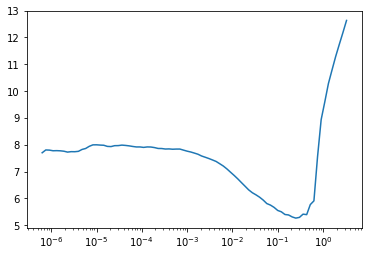

In [177]:
learn.lr_find()
learn.recorder.plot()

In [178]:
learn.fit_one_cycle(8, 2e-2)

Total time: 47:49
epoch  train loss  valid loss  log_mae     
1      0.528687    0.521715    19814.949723  (03:48)
2      0.518227    0.504596    19633.437009  (06:15)
3      0.527472    0.503582    19632.563657  (06:53)
4      0.499112    0.507041    19991.823954  (06:42)
5      0.508744    0.496233    19435.319159  (06:31)
6      0.496445    0.494201    19425.400228  (06:15)
7      0.482098    0.494703    19345.398978  (05:50)
8      0.451787    0.496380    19305.868574  (05:32)



In [46]:
pred, targ = learn.get_preds()

/Users/janmarais/anaconda3/envs/fastaiv1/lib/python3.6/site-packages/torch/nn/functional.py:1101: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [49]:
mae(pred, targ)

tensor(1.0137)

In [50]:
log_mae(pred, targ)

tensor(6.5745)

In [73]:
pred = torch.softmax(pred, 1)[:,1]

In [74]:
gini_normalized(targ.numpy(), pred.numpy())

0.26479653178411255

In [75]:
2 * roc_auc_score(targ.numpy(), pred.numpy()) - 1

0.26479653379201684

# LGBM

In [4]:
import lightgbm as lgb

/Users/janmarais/anaconda3/envs/fastaiv1/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_9.4.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [33]:
ds_name = 'bus'
PATH = Path('../data/')/ds_name

train_df = pd.read_csv(PATH/'train.csv', index_col=0)
valid_df = pd.read_csv(PATH/'valid.csv', index_col=0)
# test_df = pd.read_csv(PATH/'test.csv')

dep_var = 'number_of_ticket'
cat_names = load_list(PATH/'cat_names.txt')

data = TabularDataBunch.from_df(PATH, train_df, valid_df, dep_var, tfms=tfms, cat_names=cat_names, bs=128, log_output=False)

X_train = np.hstack([data.train_ds.cats.numpy(),data.train_ds.conts.numpy()])
X_valid = np.hstack([data.valid_ds.cats.numpy(),data.valid_ds.conts.numpy()])

y_train = data.train_ds.y.numpy()
y_valid = data.valid_ds.y.numpy()

In [39]:
ft_names = data.train_ds.cat_names + data.train_ds.cont_names

train_data = lgb.Dataset(X_train, label=y_train, feature_name=ft_names, categorical_feature=cat_names, free_raw_data=False)
valid_data = lgb.Dataset(X_valid, label=y_valid, feature_name=ft_names, categorical_feature=cat_names, free_raw_data=False)

In [51]:
param = {'num_iterations':200, 'objective':'regression', 'learning_rate':0.1, 'max_depth':2}
param['metric'] = 'mae'

In [52]:
bst = lgb.train(param, train_data, num_round, valid_sets=[train_data,valid_data], early_stopping_rounds=10)

[1]	training's l1: 5.54241	valid_1's l1: 7.43536
Training until validation scores don't improve for 10 rounds.
[2]	training's l1: 5.37487	valid_1's l1: 7.19132
[3]	training's l1: 5.21926	valid_1's l1: 7.01203
[4]	training's l1: 5.08684	valid_1's l1: 6.82317
[5]	training's l1: 4.9624	valid_1's l1: 6.68418
[6]	training's l1: 4.86096	valid_1's l1: 6.53673
[7]	training's l1: 4.77204	valid_1's l1: 6.42309
[8]	training's l1: 4.69441	valid_1's l1: 6.31014
[9]	training's l1: 4.63681	valid_1's l1: 6.19411
[10]	training's l1: 4.57392	valid_1's l1: 6.09762
[11]	training's l1: 4.53244	valid_1's l1: 6.0138
[12]	training's l1: 4.48011	valid_1's l1: 5.92918
[13]	training's l1: 4.44807	valid_1's l1: 5.83627
[14]	training's l1: 4.41215	valid_1's l1: 5.80713
[15]	training's l1: 4.39059	valid_1's l1: 5.77989
[16]	training's l1: 4.36467	valid_1's l1: 5.72499
[17]	training's l1: 4.34815	valid_1's l1: 5.70189
[18]	training's l1: 4.32206	valid_1's l1: 5.65862
[19]	training's l1: 4.29415	valid_1's l1: 5.63235

/Users/janmarais/anaconda3/envs/fastaiv1/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/janmarais/anaconda3/envs/fastaiv1/lib/python3.6/site-packages/lightgbm/basic.py:1184: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


In [26]:
y_pred = bst.predict(X_valid, num_iteration=bst.best_iteration)

In [30]:
mean_absolute_error(y_valid, y_pred)

4.6001093448588275

# RF

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [49]:
X_train = np.hstack([data.train_ds.cats.numpy(),data.train_ds.conts.numpy()])
X_valid = np.hstack([data.valid_ds.cats.numpy(),data.valid_ds.conts.numpy()])

y_train = torch.exp(data.train_ds.y).numpy()
y_valid = torch.exp(data.valid_ds.y).numpy()

In [56]:
m = RandomForestRegressor(n_estimators=40, max_features=0.99, min_samples_leaf=2,
                          n_jobs=-1, oob_score=True, criterion='mae')

In [76]:
m = RandomForestRegressor(n_estimators=100, criterion="mae", n_jobs=-1, verbose=2)

In [77]:
m.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 100building tree 2 of 100building tree 3 of 100
building tree 4 of 100


building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   16.1s


building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   43.1s finished


RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=None, verbose=2, warm_start=False)

In [68]:
preds = m.predict(X_valid)

In [69]:
m.score(X_train, y_train)

0.9443887252358121

In [70]:
m.score(X_valid, y_valid)

0.5197356221345176

In [72]:
np.mean(np.abs(y_valid-preds))

5.049006009178961

In [73]:
mean_absolute_error(y_valid, preds)

5.049006009178961